In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import json
import os

pd.set_option("display.max_columns",0)

df = pd.read_json(os.path.join("..","..","data","TA_User_Review_Seoul_all_v2.json"))

In [60]:
df.head(3)

,__typename,createdDate,helpfulVotes,id,language,location.__typename,location.additionalNames.long,location.additionalNames.longOnlyParent,location.locationId,location.name,location.parent.additionalNames.long,location.parent.locationId,location.parentGeoId,location.placeType,photoIds,photos,rating,socialStatistics.followCount,socialStatistics.isFollowing,socialStatistics.isLiked,socialStatistics.isReposted,socialStatistics.isSaved,socialStatistics.likeCount,socialStatistics.repostCount,socialStatistics.tripCount,text,title,userId,userProfile.contributionCounts.sumAllUgc,userProfile.isMe,userProfile.isVerified,userProfile.userId
0,Review,2020-03-06,0,749418557,ja,LocationInformation,"Hotel Gracery Seoul, South Korea",South Korea,14159911,Hotel Gracery Seoul,"Seoul, South Korea",294197,294197,ACCOMMODATION,[],[],4,0,False,False,False,False,0,0,0,日系のホテルなので日本語OK\n南大門も明洞も歩いて行けます\nトリプルルーム お部屋は狭め...,グレイスリーホテルソウル,E44FFBC7D1E0A97FECCCF7F8EB052E0C,8,0,0,E44FFBC7D1E0A97FECCCF7F8EB052E0C
1,Review,2020-03-01,0,748454819,en,LocationInformation,"Hotel Gracery Seoul, South Korea",South Korea,14159911,Hotel Gracery Seoul,"Seoul, South Korea",294197,294197,ACCOMMODATION,[453807126],"[{'id': 453807126, 'statuses': ['PENDING'], 'p...",5,0,False,False,False,False,0,0,0,I really enjoyed our stay here in Gracery Hote...,Great Hotel,F9AD0C1F6409A1574AD0AFC237D2A4CE,7,0,0,F9AD0C1F6409A1574AD0AFC237D2A4CE
2,Review,2020-02-16,0,745371386,ja,LocationInformation,"Hotel Gracery Seoul, South Korea",South Korea,14159911,Hotel Gracery Seoul,"Seoul, South Korea",294197,294197,ACCOMMODATION,[],[],5,0,False,False,False,False,0,0,0,今回はagoda経由で予約しました。予約後に日系のホテルと知った次第です。\nチェックイン後...,安心出来ます,770775D59B126E71D38D56FAB9B95F93,57,0,0,770775D59B126E71D38D56FAB9B95F93


In [47]:
df.shape

(144434, 32)

In [61]:
df['location.placeType'].unique()

array(['ACCOMMODATION', 'EATERY', 'ATTRACTION', 'ACTIVITY'], dtype=object)

In [64]:
df[df['location.placeType'] == 'ATTRACTION']

,__typename,createdDate,helpfulVotes,id,language,location.__typename,location.additionalNames.long,location.additionalNames.longOnlyParent,location.locationId,location.name,location.parent.additionalNames.long,location.parent.locationId,location.parentGeoId,location.placeType,photoIds,photos,rating,socialStatistics.followCount,socialStatistics.isFollowing,socialStatistics.isLiked,socialStatistics.isReposted,socialStatistics.isSaved,socialStatistics.likeCount,socialStatistics.repostCount,socialStatistics.tripCount,text,title,userId,userProfile.contributionCounts.sumAllUgc,userProfile.isMe,userProfile.isVerified,userProfile.userId
134853,Review,2020-02-14,0,744980685,en,LocationInformation,"Hongik University Street, South Korea",South Korea,1958940,Hongik University Street,"Seoul, South Korea",294197,294197,ATTRACTION,[],[],5,0,False,False,False,False,0,0,0,This is a place for you to laidback and have s...,Vibrant and Trendy,23EF5413495FF530151DB7E5C0FEF38D,225,0,0,23EF5413495FF530151DB7E5C0FEF38D
134855,Review,2020-02-14,0,744973034,en,LocationInformation,"Myeongdong Shopping Street, South Korea",South Korea,553546,Myeongdong Shopping Street,"Seoul, South Korea",294197,294197,ATTRACTION,[],[],4,0,False,False,False,False,0,0,0,This is the place where you can shop any cosme...,Chaotic Street Food,23EF5413495FF530151DB7E5C0FEF38D,225,0,0,23EF5413495FF530151DB7E5C0FEF38D
134856,Review,2020-02-07,0,743505782,en,LocationInformation,"Lotte World, South Korea",South Korea,324891,Lotte World,"Seoul, South Korea",294197,294197,ATTRACTION,[],[],4,0,False,False,False,False,0,0,0,"we went there during our winter holiday, and f...",To the Magic Island for more challenging exper...,23EF5413495FF530151DB7E5C0FEF38D,225,0,0,23EF5413495FF530151DB7E5C0FEF38D
134857,Review,2020-02-07,0,743504308,en,LocationInformation,"N Seoul Tower, South Korea",South Korea,1169465,N Seoul Tower,"Seoul, South Korea",294197,294197,ATTRACTION,[],[],4,0,False,False,False,False,0,0,0,"from myeongdong, we walk uphil to the cable ca...","Beautiful View, thats all",23EF5413495FF530151DB7E5C0FEF38D,225,0,0,23EF5413495FF530151DB7E5C0FEF38D
134858,Review,2019-06-29,0,685203058,en,LocationInformation,"Gwanghwamun Gate, South Korea",South Korea,590748,Gwanghwamun Gate,"Seoul, South Korea",294197,294197,ATTRACTION,"[404554709, 404553876, 404553841, 404553853, 4...","[{'id': 404554709, 'title': None, 'description...",3,0,False,False,False,False,0,0,0,Gwanghwamun is in fact same location as Gyeong...,The Palace Main Gate,FDCBDCCE742F09AAD83CB28AF5A26AD8,1864,0,0,FDCBDCCE742F09AAD83CB28AF5A26AD8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144429,Review,2016-09-15,0,418986337,en,LocationInformation,"Myeongdong Shopping Street, South Korea",South Korea,553546,Myeongdong Shopping Street,"Seoul, South Korea",294197,294197,ATTRACTION,[217742139],"[{'id': 217742139, 'title': 'photo1.jpg', 'des...",5,0,False,False,False,False,0,0,0,"If you're all about make up and skin care, be ...",Shopping Haven,1089B7473BE17E5E1A41C064A9F3B01A,170,0,0,1089B7473BE17E5E1A41C064A9F3B01A
144430,Review,2016-09-15,0,418987119,en,LocationInformation,"National Folk Museum of Korea, South Korea",South Korea,324890,National Folk Museum of Korea,"Seoul, South Korea",294197,294197,ATTRACTION,[],[],5,0,False,False,False,False,0,0,0,This just behind the Gyeobokgung Palace. And i...,Folk Museum,1089B7473BE17E5E1A41C064A9F3B01A,170,0,0,1089B7473BE17E5E1A41C064A9F3B01A
144431,Review,2016-09-14,1,418402883,en,LocationInformation,"Gyeongbokgung Palace, South Korea",South Korea,324888,Gyeongbokgung Palace,"Seoul, South Korea",294197,294197,ATTRACTION,"[217330451, 217330452, 217330454, 217330455, 2...","[{'id': 217330451, 'title': 'photo0.jpg', 'des...",5,0,False,False,False,False,0,0,0,Eat. Sunblock. Comfy Shoes.\nThe place is huge...,Palaces,1089B7473BE17E5E1A41C064A9F3B01A,170,0,0,1089B7473BE17E5E1A41C064A9F3B01A
144432,Review,201

In [67]:
df['photo_count'] = df.photoIds.map(lambda x: len(x))

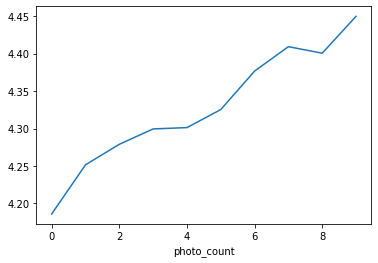

In [89]:
df.groupby(['photo_count'])['rating'].mean().sort_index()[:10].plot()

In [90]:
# df.sort_values(['photo_count'])

In [91]:
# df.loc[43211].photos

In [48]:
df_seoul_eat = df[(df['location.parent.additionalNames.long'] == "Seoul, South Korea") & (df['location.placeType'] == "EATERY")]

In [54]:
seoul_eatery_location_ids = df_seoul_eat['location.locationId'].unique()

In [113]:
len(seoul_eatery_location_ids)

5578

In [114]:
import time

In [117]:
i

4698

In [ ]:
result_arr = []

In [119]:
# result_arr

In [120]:
for i, url in enumerate(seoul_eatery_location_ids[4699:]):
    res = requests.get("https://www.tripadvisor.co.kr/data/1.0/location/{}".format(url))
    try:
        result_arr.append(res.json())
        print(i) if i % 100 == 0 else ''
    except:
        print("Error!")
        time.sleep(5)
        continue

0
100
200
300
400
500
600
700
800


In [121]:
df = pd.json_normalize(result_arr)

['location_id',
 'name',
 'latitude',
 'longitude',
 'address',
 'web_url',
 'rating']

In [140]:
df2 = df.dropna(subset=['name'])[['location_id','name','latitude','longitude','address','web_url','rating']]

In [144]:
# df2[df2['latitude'] != df2['latitude']]

In [146]:
df2.reset_index(drop=True).to_excel(os.path.join("..","..","data","TA_음식점_한글이름_주소_정보.xlsx"), index=False)

In [147]:
df2.shape

(5574, 7)

In [123]:
df.columns

Index(['location_id', 'name', 'latitude', 'longitude', 'num_reviews',
       'timezone', 'location_string', 'awards', 'doubleclick_zone',
       'preferred_map_engine', 'raw_ranking', 'ranking_geo', 'ranking_geo_id',
       'ranking_position', 'ranking_denominator', 'ranking_category',
       'ranking', 'distance', 'distance_string', 'bearing', 'rating',
       'is_closed', 'is_long_closed', 'price_level', 'neighborhood_info',
       'campaign_point_strings', 'description', 'web_url', 'write_review',
       'ancestors', 'subcategory', 'parent_display_name', 'is_jfy_enabled',
       'nearest_metro_station', 'phone', 'address',
       'is_candidate_for_contact_info_suppression', 'cuisine',
       'dietary_restrictions', 'tags', 'display_hours', 'category.key',
       'category.name', 'address_obj.street1', 'address_obj.street2',
       'address_obj.city', 'address_obj.state', 'address_obj.country',
       'address_obj.postalcode', 'photo.id', 'photo.caption',
       'photo.published_date

# 뽑을 정보 정리 필요함

[링크](https://www.tripadvisor.co.kr/Restaurant_Review-g294197-d788542-Reviews-Marco_Polo-Seoul.html)

1. Location
    1. location_id
    2. location_address - lng, lat
    3. location_name
    4. location_type - 숙박, 음식, 명소
    
    => 평균 평점, 전체 리뷰수 
    
2. Rating
    1. rating
    2. visit_time (YYYY-MM-DD)
    3. photo_count
    4. content
3. User
    1. user_id
    2. user_name
    3. is_domestic
    4. review_count